### How are in-demand skills trending for data analysts?

#### Methodology

1. Aggregate skills by month
2. Re-analyse based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
# Import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'../data/data_jobs.csv')

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### Filter for Data Analyst Jobs in Australia

In [6]:
df_DA_aus = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Australia')].copy()
df_DA_aus['job_posted_month_no'] = df_DA_aus['job_posted_date'].dt.month # Create month number column
print(df_DA_aus['job_title_short'].value_counts())
print(df_DA_aus['job_country'].value_counts())
print(df_DA_aus.info())

job_title_short
Data Analyst    1658
Name: count, dtype: int64
job_country
Australia    1658
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1658 entries, 1374 to 785244
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        1658 non-null   object        
 1   job_title              1658 non-null   object        
 2   job_location           1658 non-null   object        
 3   job_via                1658 non-null   object        
 4   job_schedule_type      1634 non-null   object        
 5   job_work_from_home     1658 non-null   bool          
 6   search_location        1658 non-null   object        
 7   job_posted_date        1658 non-null   datetime64[ns]
 8   job_no_degree_mention  1658 non-null   bool          
 9   job_health_insurance   1658 non-null   bool          
 10  job_country            1658 non-null   object        
 11  sa

In [17]:
# Expand list of job skills
df_DA_aus_explode = df_DA_aus.explode('job_skills')

In [24]:
# Create pivot table
df_DA_aus_pivot = df_DA_aus_explode.pivot_table(columns='job_skills', index='job_posted_month_no', aggfunc='size', fill_value=0)
df_DA_aus_pivot.loc['Total'] = df_DA_aus_pivot.sum() # Create row for total count of skill
df_DA_aus_pivot

job_skills,airflow,alteryx,angular,ansible,apl,asana,assembly,atlassian,aws,azure,...,vba,visio,visual basic,vmware,watson,webex,windows,word,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2,7,0,0,0,0,0,4,15,22,...,4,1,0,1,0,0,4,8,0,0
2,1,5,0,1,0,0,0,0,8,7,...,0,0,1,2,0,0,1,5,1,0
3,2,0,0,1,0,0,0,0,7,5,...,1,1,0,0,0,0,1,8,1,0
4,1,3,0,1,0,0,0,0,6,8,...,0,1,0,1,0,0,2,3,0,0
5,2,3,0,0,0,0,0,0,6,5,...,2,0,0,0,0,1,0,2,1,0
6,1,5,0,0,1,0,0,0,7,7,...,3,0,1,0,0,0,0,4,0,0
7,3,6,0,1,0,0,1,1,10,9,...,0,0,0,0,0,0,0,10,0,1
8,1,7,0,1,0,0,0,2,16,17,...,4,1,0,1,1,0,0,9,0,1
9,1,6,0,1,0,0,0,0,12,20,...,4,1,0,2,0,0,1,5,0,0


In [31]:
# Sort pivot table by Total row - by most in-demand skills
df_DA_aus_pivot = df_DA_aus_pivot[df_DA_aus_pivot.loc['Total'].to_frame().sort_values(by='Total', ascending=False).index]

In [ ]:
# Delete Total row
df_DA_aus_pivot = df_DA_aus_pivot.drop('Total')

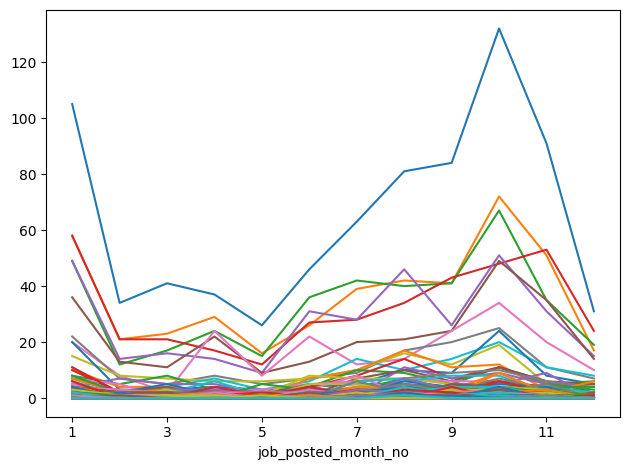

In [38]:
df_DA_aus_pivot.plot(kind='line', legend=False)
plt.tight_layout()
plt.show()

In [86]:
# Find total number of job postings per month
DA_totals = df_DA_aus.groupby('job_posted_month_no').size()

# Calculate percent of total job postings that requested each skill
df_DA_aus_percent = df_DA_aus_pivot.div(DA_totals/100, axis=0)

# Change month number into month name
df_DA_aus_percent = df_DA_aus_percent.reset_index()
df_DA_aus_percent['job_posted_month'] = df_DA_aus_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_aus_percent = df_DA_aus_percent.set_index('job_posted_month')
df_DA_aus_percent = df_DA_aus_percent.drop(columns='job_posted_month_no')
df_DA_aus_percent

job_skills,sql,python,power bi,excel,tableau,r,sas,azure,aws,go,...,graphql,phoenix,smartsheet,slack,sqlite,svelte,terminal,unify,webex,watson
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,49.295775,27.230047,23.004695,27.230047,23.004695,16.901408,9.389671,10.328638,7.042254,5.164319,...,0.000000,0.000000,0.469484,0.000000,0.000000,0.000000,0.469484,0.000000,0.000000,0.000000
Feb,40.000000,24.705882,14.117647,24.705882,16.470588,15.294118,9.411765,8.235294,9.411765,2.352941,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.176471,0.000000,0.000000,0.000000,0.000000
Mar,44.086022,24.731183,18.279570,22.580645,17.204301,11.827957,2.150538,5.376344,7.526882,4.301075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,39.361702,30.851064,25.531915,18.085106,14.893617,23.404255,25.531915,8.510638,6.382979,7.446809,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,46.428571,28.571429,26.785714,21.428571,16.071429,16.071429,14.285714,8.928571,10.714286,5.357143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.785714,0.000000
Jun,50.000000,28.260870,39.130435,29.347826,33.695652,14.130435,23.913043,7.608696,7.608696,6.521739,...,0.000000,1.086957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,46.666667,28.888889,31.111111,20.740741,20.740741,14.814815,8.888889,6.666667,7.407407,10.370370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,47.093023,24.418605,23.255814,19.767442,26.744186,12.209302,8.139535,9.883721,9.302326,5.813953,...,0.000000,0.000000,0.000000,0.581395,0.581395,0.000000,0.000000,0.000000,0.000000,0.581395
Sept,45.161290,22.043011,22.043011,23.118280,13.978495,12.903226,12.903226,10.752688,6.451613,7.526882,...,0.537634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


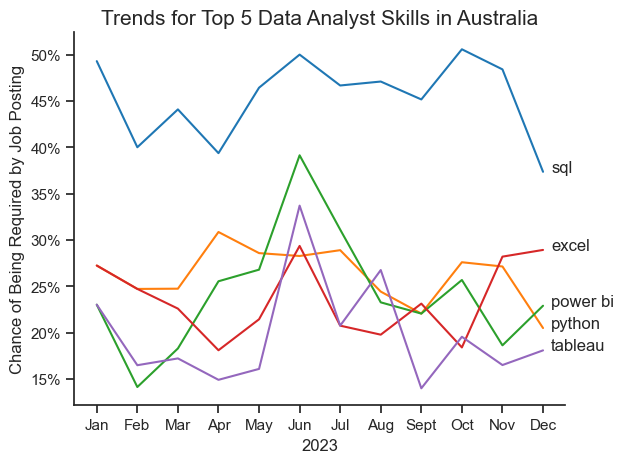

In [127]:
# Creating line plot
df_plot = df_DA_aus_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
plt.title('Trends for Top 5 Data Analyst Skills in Australia', fontsize=15)
plt.xlabel('2023')
plt.ylabel('Chance of Being Required by Job Posting')
plt.legend().remove()
sns.despine()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(df_plot.shape[1]):
    plt.text(x=11.2, y=df_plot.iloc[-1, i], s=df_plot.columns[i])

plt.tight_layout()
plt.show()


In [111]:
# help(plt.text)
# help(pd.DataFrame.iloc)
df_plot

job_skills,sql,python,power bi,excel,tableau
job_posted_month,,,,,
Jan,49.295775,27.230047,23.004695,27.230047,23.004695
Feb,40.000000,24.705882,14.117647,24.705882,16.470588
Mar,44.086022,24.731183,18.279570,22.580645,17.204301
Apr,39.361702,30.851064,25.531915,18.085106,14.893617
May,46.428571,28.571429,26.785714,21.428571,16.071429
Jun,50.000000,28.260870,39.130435,29.347826,33.695652
Jul,46.666667,28.888889,31.111111,20.740741,20.740741
Aug,47.093023,24.418605,23.255814,19.767442,26.744186
Sept,45.161290,22.043011,22.043011,23.118280,13.978495
